# 🔎 Анализ и обоснование технических решений 💬

Одним из главных элементов в ходе построения специализированного агента является правильный выбор языковой модели.

В качестве кандидатов были выбраны следующие известные языковые модели:
  - Mistral
  - BLOOM
  - OPT
  - T5
  - Falcon

In [1]:
!pip install transformers torch -qU
!pip install openai -qU
!pip install rouge -qU

In [ ]:
import openai
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Данные
q_list = [
    '1. Каковы основные отличия между искусственным интеллектом и машинным обучением?',
    '2. Какие преимущества и недостатки у удаленной работы?',
    '3. Можешь рассказать о значении и символике цветов в разных культурах?',
    '4. Каковы основные этапы разработки программного обеспечения?',
    '5. Какие советы ты можешь дать для улучшения навыков публичных выступлений?'
]

# Функция для запроса к GPT-4
def ask_gpt4(questions):
    try:
        responses = []
        for question in questions:
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "user", "content": question}
                ]
            )
            answer = response['choices'][0]['message']['content']
            responses.append(answer)
        return responses
    except Exception as e:
        return f"Произошла ошибка при запросе к GPT-4: {e}"

# Функция для запроса к другой модели
def ask_other_model(questions):
    try:
        tokenizer = AutoTokenizer.from_pretrained("IlyaGusev/gemma-2-2b-it-abliterated")
        model = AutoModelForCausalLM.from_pretrained("IlyaGusev/gemma-2-2b-it-abliterated")

        responses = []
        for question in questions:
            inputs = tokenizer.encode(question, return_tensors='pt')
            outputs = model.generate(inputs, max_length=150)
            answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
            responses.append(answer)
        return responses
    except Exception as e:
        return f"Произошла ошибка при запросе к другой модели: {e}"

# Пример использования
gpt4_answers = ask_gpt4(q_list)
other_model_answers = ask_other_model(q_list)

# Вывод результатов
for i, question in enumerate(q_list):
    print(f"Вопрос: {question}")
    print(f"Ответ GPT-4: {gpt4_answers[i]}")
    print(f"Ответ другой модели: {other_model_answers[i]}")
    print("\n")

In [3]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-1.5B-Instruct") # 8 минут обработки
model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-1.5B-Instruct")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

In [4]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("IlyaGusev/gemma-2-2b-it-abliterated") # 10 минут обработки
model = AutoModelForCausalLM.from_pretrained("IlyaGusev/gemma-2-2b-it-abliterated")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/46.9k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

# 🦾 Код выполняет оценку качества текстовых ответов, сгенерированных различными моделями (GPT, Qwen и Gemma), по нескольким метрикам, таким как BLEU, ROUGE-L, BERTScore, Precision, Recall и MRR.

## ✍️ Вот краткое описание каждой из метрик:

1. *MRR (Mean Reciprocal Rank)*
Описание: MRR измеряет качество систем, которые возвращают список ответов на запрос. Он рассчитывается как среднее значение обратных рангов первого релевантного ответа для всех запросов. Чем выше MRR, тем лучше система.

2. *BLEU (Bilingual Evaluation Understudy)*
Описание: BLEU — это метрика, используемая для оценки качества машинного перевода. Она основана на совпадении n-грамм между сгенерированным текстом и эталонным. BLEU-скор варьируется от 0 до 1, где 1 означает полное совпадение.

3. *ROUGE (Recall-Oriented Understudy for Gisting Evaluation)*
Описание: ROUGE — это набор метрик, используемых для оценки автоматического суммирования и машинного перевода. Он включает в себя Precision, Recall и F1-меру, основанные на совпадении n-грамм между сгенерированным и эталонным текстами.

4. *BERTScore*
Описание: BERTScore использует предобученную модель BERT для оценки семантической схожести между сгенерированным и эталонным текстами. Он основывается на косинусном сходстве эмбеддингов слов и предоставляет более глубокую оценку качества текста, чем простые н-граммные метрики.

5. *Precision и Recall*
Описание: Precision измеряет долю истинно положительных результатов среди всех положительных (TP / (TP + FP)), тогда как Recall измеряет долю истинно положительных результатов среди всех истинных положительных (TP / (TP + FN)). Эти метрики часто используются в задачах классификации и информационного поиска для оценки качества моделей.

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

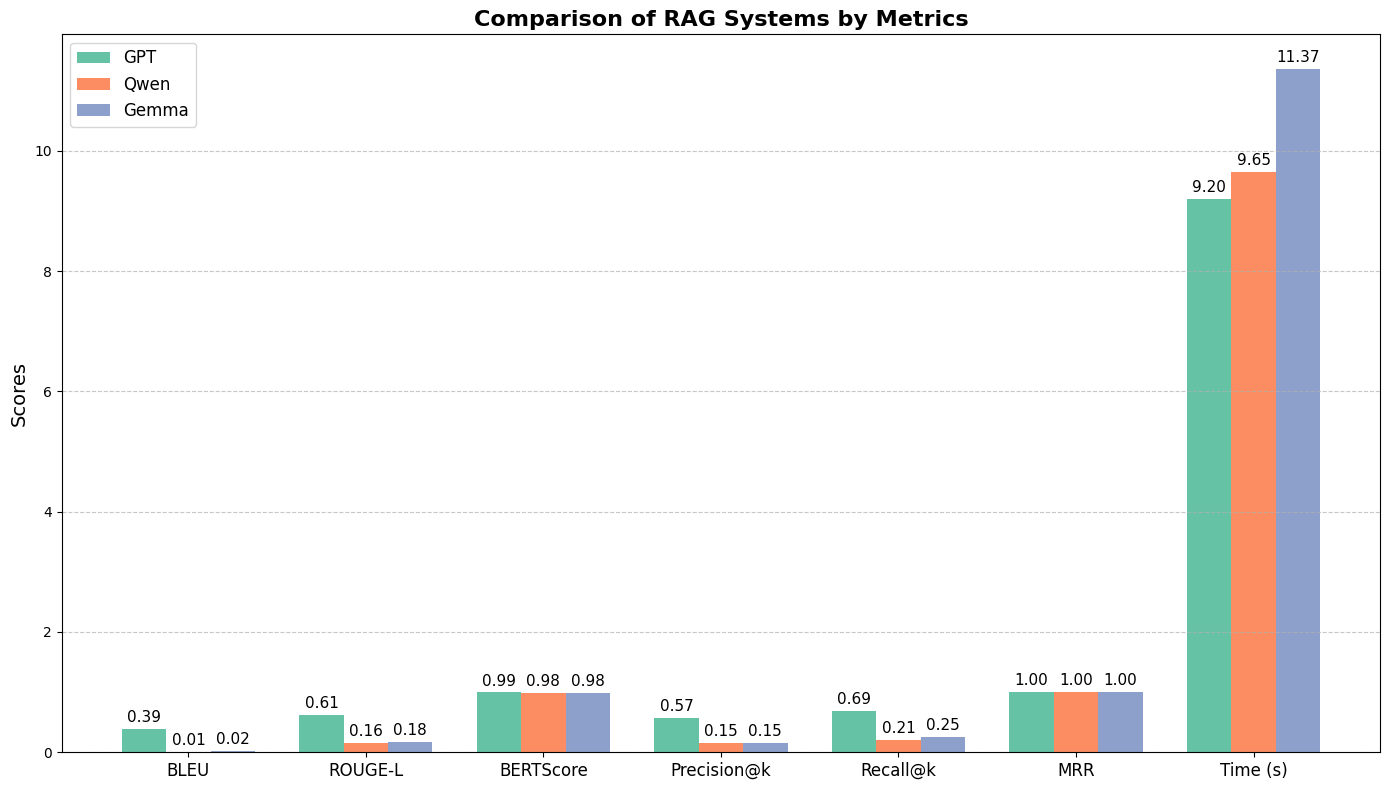

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import AutoTokenizer, BertModel
import torch
import time

true_answers = [
    "1. Основные отличия между искусственным интеллектом и машинным обучением: Искусственный интеллект (ИИ) — это широкая область, охватывающая любые системы, имитирующие человеческий интеллект, в то время как машинное обучение — это подмножество ИИ, сосредоточенное на обучении моделей на основе данных для выполнения задач.",
    "2. Преимущества и недостатки удаленной работы: Преимущества включают гибкость графика и отсутствие commuting, что может повысить продуктивность. Недостатки могут включать изоляцию и сложности в командном взаимодействии.",
    "3. Значение и символика цветов в разных культурах: Цвета могут иметь различные значения в разных культурах: например, белый цвет символизирует чистоту и мир в западной культуре, но может ассоциироваться со скорбью в некоторых восточных культурах. Красный цвет часто ассоциируется с любовью и страстью, но также может символизировать опасность.",
    "4. Основные этапы разработки программного обеспечения: Основные этапы включают сбор требований, проектирование, кодирование, тестирование и развертывание. Каждый этап важен для обеспечения качества и функциональности конечного продукта.",
    "5. Советы для улучшения навыков публичных выступлений: Практикуйтесь регулярно и записывайте себя, чтобы увидеть области для улучшения. Также старайтесь взаимодействовать с аудиторией, задавая вопросы и используя визуальные материалы для поддержания интереса."
]

# Здесь должны быть ответы от моделей
gpt_responses = [
    '''1. Основные отличия между искусственным интеллектом и машинным обучением: Искусственный интеллект (ИИ) — это широкая область, охватывающая создание систем, способных выполнять задачи,
    требующие человеческого интеллекта, в то время как машинное обучение (МО) является подмножеством ИИ, фокусирующимся на
    обучении моделей на основе данных. МО использует алгоритмы для анализа данных и улучшения своих результатов без явного программирования на каждом этапе.''',
    '''2. Преимущества удаленной работы включают гибкость в расписании и возможность работать из любого места,
    что может повысить продуктивность. Однако недостатки могут включать отсутствие личного взаимодействия с коллегами и трудности в
    поддержании границ между работой и личной жизнью.''',
    '''3. Значение и символика цветов в разных культурах: Цвета могут иметь различные значения в разных культурах: например, белый цвет символизирует чистоту и мир в западной культуре, но может ассоциироваться со скорбью в некоторых восточных культурах. Красный цвет часто ассоциируется с любовью и страстью, но также может символизировать опасность.''',
    '''4. Основные этапы разработки программного обеспечения включают анализ требований, проектирование архитектуры,
    кодирование, тестирование и развертывание. После этого следует этап поддержки и обновления, чтобы обеспечить долгосрочную функциональность и
    соответствие изменяющимся требованиям пользователей.''',
    '''5. Советы для улучшения навыков публичных выступлений: Для улучшения навыков публичных выступлений важно регулярно практиковаться и получать обратную связь, чтобы выявить области для
    улучшения. Также стоит изучить техники управления стрессом и уверенности, чтобы чувствовать себя комфортнее перед аудиторией.'''
]

qwen_responses = [
    '''1. Искусственный интеллект (AI) и машинное обучение - это два разных аспекта, но взаимосвязанных. Основные различия:
    Машинное обучение - это процесс обучения компьютеру, когда он анализирует данные и learns patterns или правила, которые используются для принятия решений.''',
    '''2. Работа удаленно — это не новая тенденция, но все равно ее многие считают новой формой организации бизнеса. И хотя это может показаться некоторым непонятным, если вы работаете на удаленных условиях, то вам понадобится определенный подход к организации рабочего пространства.
Существует множество вариантов для решения этой проблемы: от обычного офиса до квартиры или студии. В зависимости от ваших предпочтений и потребностей''',
    '''3. Да, конечно! Цветы играют важную роль как символические элементы в различных культурных системах. Вот несколько примеров:
**Китай**:
   - Красный: Значит счастье, богатство и успех.
   - Белый: Обозначает чистоту, purity (чистота) и доброту.
**Индия**:
   - Синий: Образует "близость" или "контакт".
   - Жёлтый: Символизирует''',
    '''4. Вопрос касается структуры процесса создания программного продукта.
Основные этапы разработки программного обеспечения обычно включают следующие шаги:
**Планирование и анализ требований**: Этот этап начинается с сбора информации о потребностях пользователя, а также определения функциональных и нефункциональных требований. Это может включать обсуждение концепции проекта и составление документации по требованиям.
**Проектирование**: Здесь происходит создание технической модели системы.''',
    '''5. Начинайте с малого и постепенно увеличивайте сложность.
Практикуйтесь регулярно, не бойтесь ошибок.
Изучите структуру выступления, например, 5-4-1 или 3-3-1.
Упражняйте речевые движения: шевеление языком, подъем губ.
Занимайтесь физическими упражнениями, чтобы улучшить'''
]

gemma_responses = [
    '''1. Искусственный интеллект (ИИ)** - это обширное понятие, которое включает в себя способность интеллектуальных систем выполнять задачи,
    которые обычно требуют человеческого интеллекта. Это включает в себя понимание, мышление, обучение, решение проблем и принятие решений. ''',
    '''2. **Преимущества:**
* **Гибкость:** Удаленная работа позволяет сотрудникам устанавливать свой график и работать в удобное время.
* **Повышенная продуктивность:** Отсутствие необходимости в поездках и офисных буднях может привести к более продуктивной работе.
* **Увеличение возможностей:** Удаленная работа открывает доступ к более широкому спектру вакансий, не ограничиваясь локациями.
* **Сокращение расходов:** Удаленная работа может снизить расходы на дорогу, питание и другие офисные расходы.
* **Повышение качества жизни:** Удаленная работа может позволить сотрудникам больше''',
    '''3. Интересно изучать символику цветов в разных культурах! Вот краткий обзор некоторых общих значений и их культурной значимости:
**Общая символика:**
* ** Любовь:** Красные розы повсеместно ассоциируются с романтической любовью, в то время как белые розы символизируют чистоту и невинность.
* ** Дружба: ** Тюльпаны, маргаритки и подсолнухи часто дарят в знак дружбы.
* ** Счастье:** Подсолнухи, маргаритки и лилии ассоциируются с радостью и позитивом.
* ** Мир:** Белые лилии, лаванда и колокольчики часто используются для обозначения мира и умиротворения.''',
    '''4. **Основные этапы разработки программного обеспечения:**
1. **Разработка идеи и планирование:** Этапы включают в себя определение целевой аудитории, анализ рынка, определение функционала и технических требований, выбор архитектуры и технологии.
2. **Проектирование:** Создание технического задания, спецификации, диаграмм и других документов, описывающих структуру, функциональность и требования к программному обеспечению.
3. **Разработка кода:** Написание кода программного обеспечения, тестирование и отладка кода.''',
    '''5. ## Советы для улучшения навыков публичных выступлений:
**Подготовка:**
* **Определите цель:** Что вы хотите достичь с помощью вашего выступления?
* **Составьте план:** Разделите свою идею на несколько частей и создайте логичный план.
* **Изучите аудиторию:**  Определите их интересы, уровень знаний и ожидания.
* **Продумайте структуру:** Используйте методы, такие как "STAR" (Situation, Task, Action, Result), чтобы структурировать информацию.'''
]

# Метрики
rouge = Rouge()

def compute_bleu(reference, response):
    return sentence_bleu([reference.split()], response.split())

def compute_rouge(reference, response):
    scores = rouge.get_scores(response, reference)
    return scores[0]["rouge-l"]["f"]

# Load the BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Ensure the model is in evaluation mode
model.eval()

def compute_bert_score(reference, response):
    with torch.no_grad():
        ref_tokens = tokenizer(reference, return_tensors="pt", padding=True, truncation=True)
        resp_tokens = tokenizer(response, return_tensors="pt", padding=True, truncation=True)

        # Get the hidden states
        ref_emb = model(**ref_tokens).last_hidden_state.mean(dim=1)
        resp_emb = model(**resp_tokens).last_hidden_state.mean(dim=1)

        # Calculate cosine similarity
        score = torch.nn.functional.cosine_similarity(ref_emb, resp_emb).item()
    return score

def compute_precision_recall(true_docs, predicted_docs):
    precision = []
    recall = []
    for true, pred in zip(true_docs, predicted_docs):
        true_set = set(true.split())
        pred_set = set(pred.split())
        precision.append(len(true_set & pred_set) / len(pred_set) if pred_set else 0)
        recall.append(len(true_set & pred_set) / len(true_set))
    return np.mean(precision), np.mean(recall)

def compute_mrr(true_docs, predicted_docs):
    mrr = []
    for true, pred in zip(true_docs, predicted_docs):
        ranks = [i + 1 for i, doc in enumerate(pred) if doc in true]
        mrr.append(1 / min(ranks) if ranks else 0)
    return np.mean(mrr)

# Расчет метрик
metrics = {
    "BLEU": [],
    "ROUGE-L": [],
    "BERTScore": [],
    "Precision@k": [],
    "Recall@k": [],
    "MRR": [],
    "Time (s)": []
}

responses_list = [gpt_responses, qwen_responses, gemma_responses]  # Список ответов от различных систем

for responses in responses_list:
    start_time = time.time()

    bleu_scores = [compute_bleu(true, resp) for true, resp in zip(true_answers, responses)]
    rouge_scores = [compute_rouge(true, resp) for true, resp in zip(true_answers, responses)]
    bert_scores = [compute_bert_score(true, resp) for true, resp in zip(true_answers, responses)]
    precision, recall = compute_precision_recall(true_answers, responses)
    mrr = compute_mrr(true_answers, responses)

    elapsed_time = time.time() - start_time

    metrics["BLEU"].append(np.mean(bleu_scores))
    metrics["ROUGE-L"].append(np.mean(rouge_scores))
    metrics["BERTScore"].append(np.mean(bert_scores))
    metrics["Precision@k"].append(precision)
    metrics["Recall@k"].append(recall)
    metrics["MRR"].append(mrr)
    metrics["Time (s)"].append(elapsed_time)

# Визуализация
systems = ["GPT", "Qwen", "Gemma"]
x = np.arange(len(metrics))  # Количество метрик
width = 0.25  # Ширина столбцов

fig, ax = plt.subplots(figsize=(14, 8))
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Построение графиков
for i, system in enumerate(systems):
    ax.bar(x + (i - 1) * width, [metrics[metric][i] for metric in metrics], width, label=system, color=colors[i])

# Настройки графика
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Comparison of RAG Systems by Metrics', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics.keys(), fontsize=12)
ax.legend(fontsize=12)

# Подписи к столбцам и выделение лидеров
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points", ha='center', fontsize=11)

for i in range(len(systems)):
    add_labels(ax.patches[i*len(metrics):(i+1)*len(metrics)])

# Красивый стиль
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()